<a href="https://colab.research.google.com/github/LS913/Coding-Projects/blob/main/Python%20-%20Nasa%20Astronauts%20Data%20Visualization%20ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from altair import Chart
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [ ]:
data = pd.read_csv('/astronauts.csv')
data

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,NaN,NaN
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN


In [ ]:
#Renaming Columns
data = data.rename(columns={'Undergraduate Major': 'Undergraduate', 'Graduate Major': 'Graduate'})
data

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate,Graduate,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,NaN,NaN
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN


In [ ]:
data.describe()

,Year,Group,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr)
count,330.000000,330.000000,357.000000,357.000000,357.000000,357.000000
mean,1985.106061,11.409091,2.364146,1249.266106,1.246499,7.707283
std,13.216147,5.149962,1.428700,1896.759857,2.056989,13.367973
min,1959.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1978.000000,8.000000,1.000000,289.000000,0.000000,0.000000
50%,1987.000000,12.000000,2.000000,590.000000,0.000000,0.000000
75%,1996.000000,16.000000,3.000000,1045.000000,2.000000,12.000000
max,2009.000000,20.000000,7.000000,12818.000000,10.000000,67.000000


In [ ]:
#Filling all Nans with 0
data.fillna(0)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,0,0,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",0,0
1,Loren W. Acton,0.0,0.0,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,0,0,1,190,0,0.0,STS 51-F (Challenger),0,0
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",0,0
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",0,0
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,0,0,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,0,0
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,0,0,0
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,0,0
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,0,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",0,0


In [ ]:
#Scatterplot of Space Flights vs Space Walks
ScatterPlot = alt.Chart(data,title='Space Flights vs. Space Walks',width=500,height=300).mark_point().encode(
    x=alt.X('Space Flights',title='Space Flights', scale=alt.Scale(domain=(0.5, 7.5),)),
    y=alt.Y('Space Walks',title='Space Walks',scale=alt.Scale(domain=(0, 11))),
    tooltip=['Name', 'Space Flights', 'Space Walks'],
    color=alt.Color('Space Flights',scale=alt.Scale(scheme='dark2'), legend=alt.Legend(title="Space Flights")),
    size='Space Flights'
)
ScatterPlot.interactive()

alt.Chart(...)

In [ ]:
#Looking at # of Male and Female NASA Astronauts
data['Gender'].value_counts()

Male      307
Female     50
Name: Gender, dtype: int64

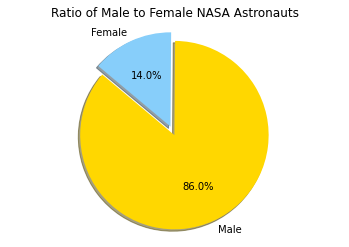

In [ ]:
#Pie Chart of Male to Female NASA Astronauts
#Data
labels = 'Male', 'Female'
sizes = [307, 50]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

#Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Ratio of Male to Female NASA Astronauts")

plt.axis('equal')
plt.show()

In [ ]:
data['Undergraduate'].value_counts()

Physics                     35
Aerospace Engineering       33
Mechanical Engineering      30
Aeronautical Engineering    28
Electrical Engineering      23
                            ..
Military Engineering         1
Mathematics; Russian         1
Geosciences                  1
Music                        1
Business Finance             1
Name: Undergraduate, Length: 83, dtype: int64

In [ ]:
#Tallying up # of Undergraduate and Graduate Majors that are repeating
data1 = data['UndergraduateCount'] = data['Undergraduate'].map(data['Undergraduate'].value_counts())
data2 = data['GraduateCount'] = data['Graduate'].map(data['Graduate'].value_counts())

In [ ]:
#Filling all columns that are Null with 0
data.fillna(0)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate,Graduate,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,UndergraduateCount,GraduateCount
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,0,0,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",0,0,5.0,2.0
1,Loren W. Acton,0.0,0.0,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,0,0,1,190,0,0.0,STS 51-F (Challenger),0,0,3.0,1.0
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",0,0,12.0,21.0
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",0,0,3.0,1.0
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",0,0,30.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,0,0,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,0,0,23.0,16.0
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,0,0,0,35.0,1.0
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,0,0,1.0,3.0
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,0,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",0,0,28.0,0.0


In [ ]:
#Dataframe with only Names and Undergraduate/Graduate Majors + Changing all Nan Values
data3 = data[['Name','Undergraduate','Graduate','UndergraduateCount','GraduateCount']]
data3['Undergraduate'].fillna("No Degree", inplace = True)
data3['UndergraduateCount'].fillna("22", inplace = True)
pd.set_option('display.max_rows', None)
data3


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Name,Undergraduate,Graduate,UndergraduateCount,GraduateCount
0,Joseph M. Acaba,Geology,Geology,5,2.0
1,Loren W. Acton,Engineering Physics,Solar Physics,3,1.0
2,James C. Adamson,Engineering,Aerospace Engineering,12,21.0
3,Thomas D. Akers,Applied Mathematics,Applied Mathematics,3,1.0
4,Buzz Aldrin,Mechanical Engineering,Astronautics,30,5.0
5,Andrew M. Allen,Mechanical Engineering,Business Administration,30,3.0
6,Joseph P. Allen,Mathematics & Physics,Physics,5,15.0
7,Scott D. Altman,Aeronautical & Astronautical Engineering,Aeronautical Engineering,6,27.0
8,William A. Anders,Nuclear Engineering,Nuclear Engineering,1,3.0
9,Clayton C. Anderson,Physics,Aerospace Engineering,35,21.0


In [ ]:
#Consolidating Undergraduate Major Names
data4 = data3.replace({'Solid Earth Sciences': 'Natural Science', 'Engineering Science': 'Engineering',
                                        'Earth & Planetary Science':'Natural Science', 
                                        'Engineering Mechanics': 'Engineering', 'Applied Science & Engineering': 'Engineering', 
                                        'Military Engineering' : 'Engineering', 'Applied Mathematics' : 'Natural Science', 'Mathematics & Physics': 'Natural Science',
                                        'Mathematics & Economics': 'Natural Science', 'Mathematics & Statistics': 'Natural Science', 
                                        'Aeronautical & Astronautical Engineering':'Engineering',
                                        'Aeronautics & Astronautics':'Engineering', 'Aeronautical Engineering':'Engineering',
                                        'Aerospace Engineering & Mechanics':'Engineering', 'Astronautics & Mathematics':'Engineering',
                                        'Physics & Mechanical Engineering':'Natural Science', 'Physics & Mathematics':'Natural Science','Physical Science':'Natural Science',
                                        'Physics & Astronomy':'Natural Science', 'Physiological Optics': 'Natural Science', 'Engineering Physics': 'Natural Science',
                                        'Physics & Engineering': 'Natural Science', 'Space Physics': 'Natural Science', 'Astronomy':'Natural Science',
                                        'Physics & Astronautical Engineering': 'Natural Science','Computer & Systems Engineering': 'Engineering',
                                        'Electrical Science': 'Engineering', 'Electronics Engineering':'Engineering',
                                        'Russian': 'Language', 'English': 'Language', 'Biological Science':'Natural Science', 'Applied Biology': 'Natural Science',
                                        'Zoology': 'Natural Science', 'Animal Science': 'Natural Science', 'Human Biology': 'Natural Science', 'Physiology': 'Natural Science',
                                        'Animal Nutrition':'Natural Science', 'Physiology': 'Natural Science', 'Animal Nutrition': 'Natural Science', 'Biochemistry': 'Natural Science',
                                        'Chemistry & Biology':'Natural Science',
                                        'Ocean Engineering': 'Engineering','Marine Engineering & Nautical Science':'Engineering',
                                        'Business Finance': 'Social Science','Business Economics':'Social Science','Business Management':'Social Science', ' Accounting': 'Social Science',
                                        'Industrial Management': 'Social Science','Engineering Management':'Social Science','Military Science':'Natural Science',
                                        'Mechanical & Aeronautical Engineering': 'Engineering','Biology & Psychology':'Natural Science','Chemistry;Physiological Optics':'Natural Science',
                                        'Applied Biology; Mechanical Engineering':'Natural Science','Mathematics; Russian':'Natural Science',
                                        'Mathematical & Electrical Science':'Natural Science','Mathematics & Statistics; Chemistry':'Natural Science',
                                        'Business Management; Aeronautical Engineering':'Social Science','Chemistry; Physiological Optics':'Natural Science',
                                        'Aeronautics & Astronautics; Earth, Atmospheric & Planetary Sciences':'Engineering',
                                        'Engineering Sciences; Astronautics & Mathematics':'Engineering','Astronautical Engineering':'Engineering',
                                        'Systems Engineering':'Engineering','Electrical Engineering; Computer Science':'Engineering',
                                        'Astronautics':'Engineering','Natural Science; English':'Natural Science','Bioscience':'Natural Science','Economics':'Social Science',
                                        'Geosciences':'Natural Science','Business Economics':'Social Science','Ecological Science':'Natural Science','Molecular Biology':'Natural Science',
                                        'Earth Sciences':'Natural Science','Electrical Engineering':'Engineering','Biology':'Natural Science','Mechanical Engineering':'Engineering',
                                        'Chemical Engineering':'Engineering','Aerospace Engineering':'Engineering','Civil Engineering':'Engineering','Naval Sciences':'Natural Science',
                                        'Geology':'Natural Science','Nuclear Engineering':'Engineering','Physics':'Natural Science','Ceramic Engineering':'Engineering','Aerospace Engineering':'Engineering',
                                        'Metallurgical Engineering':'Engineering','Physics; English':'Natural Science','Chemistry':'Natural Science','Computer Science':'Engineering',
                                        'Industrial Engineering':'Engineering','Psychology':'Social Science','Philosophy':'Social Science','Education':'Social Science','Education':'Social Science',
                                        'Music':'Social Science','Accounting':'Social Science','Mathematics':'Natural Science'
})


In [ ]:
data4['Undergraduate'].value_counts()

Engineering        197
Natural Science    125
No Degree           22
Social Science      13
Name: Undergraduate, dtype: int64

In [ ]:
import pandas as pd
data5 = [['Engineering', 197], ['Natural Science', 125],['No Degree', 22],['Social Science', 13]] 
data6 = pd.DataFrame(data5, columns = ['Undergraduate Major', 'Undergraduate Major Count'])
print(data6)

  Undergraduate Major  Undergraduate Major Count
0         Engineering                        197
1     Natural Science                        125
2           No Degree                         22
3      Social Science                         13


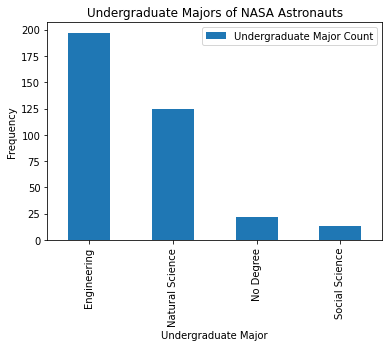

In [ ]:
#Bar plot of Compiled Undergraduate Majors
import matplotlib.pyplot as plt
data6.plot('Undergraduate Major', 'Undergraduate Major Count', kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Undergraduate Major')
plt.title('Undergraduate Majors of NASA Astronauts')
for txt in fig.texts:
    txt.set_visible(False)

In [ ]:
#Filling in empty cells in Military Rank and Military Branch with NaN then changing them to Non-Military
data7=data.fillna("")
#data8 = data7['Military Rank'].fillna("Civilian", inplace = True)
#data9 = data8['Military Branch'].fillna("Civilian", inplace = True)


In [ ]:
data7

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004,19,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,Non-Military,Non-Military,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",,
1,Loren W. Acton,,,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,Non-Military,Non-Military,1,190,0,0.0,STS 51-F (Challenger),,
2,James C. Adamson,1984,10,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",,
3,Thomas D. Akers,1987,12,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",,
4,Buzz Aldrin,1963,3,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990,13,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,Non-Military,Non-Military,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,,
353,Neil W. Woodward III,1998,17,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,,,
354,Alfred M. Worden,1966,5,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,,
355,John W. Young,1962,2,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",,


In [ ]:
data7['Military Rank'].value_counts()

Non-Military             150
Colonel                   94
Captain                   68
Commander                 13
Lieutenant Colonel        10
Major                      5
Major General              4
Brigadier General          4
Lieutenant Commander       3
Rear Admiral               2
Lieutenant General         2
Vice Admiral               1
Chief Warrant Officer      1
Name: Military Rank, dtype: int64

In [ ]:
data7['Military Branch'].value_counts()

Non-Military                       146
US Air Force (Retired)              61
US Navy (Retired)                   59
US Navy                             21
US Air Force                        21
US Marine Corps (Retired)           17
US Army (Retired)                   13
US Army                              4
US Air Force Reserves (Retired)      3
US Marine Corps                      3
US Marine Corps Reserves             2
US Coast Guard (Retired)             2
US Air Force Reserves                2
US Naval Reserves                    2
US Naval Reserves (Retired)          1
Name: Military Branch, dtype: int64

In [ ]:
#Adding MilitaryBranchCount & MilitaryRankCount Columns to DataFrame
data10 = data7['MilitaryBranchCount'] = data7['Military Branch'].map(data7['Military Branch'].value_counts())
data11 = data7['MilitaryRankCount'] = data7['Military Rank'].map(data7['Military Rank'].value_counts())
data7


In [ ]:
data7["MilitaryBranchCount"].astype(str).astype(int)
data7["MilitaryRankCount"].astype(str).astype(int)

In [ ]:
#Renaming to make data cleaner
data7 = data7.replace({'US Air Force (Retired)': 'US Air Force','US Navy (Retired)':'US Navy',
                        'US Marine Corps (Retired)':'US Marine Corps','US Army (Retired)':'US Army',
                        'US Air Force Reserves (Retired)':'US Air Force Reserves',
                        'US Coast Guard (Retired)':'US Coast Guard','US Navy Reserves (Retired)':'US Navy Reserves',
                        'US Naval Reserves (Retired)':'US Naval Reserves'
                    
})
data7['Military Branch'].value_counts()

Non-Military                146
US Air Force                 82
US Navy                      80
US Marine Corps              20
US Army                      17
US Air Force Reserves         5
US Naval Reserves             3
US Marine Corps Reserves      2
US Coast Guard                2
Name: Military Branch, dtype: int64

In [ ]:
import altair as alt
Chart(data7).mark_bar().encode(
   x='Military Branch',
   y='MilitaryBranchCount',
   color='Military Branch',
).properties(width=500, title = 'How many NASA Astronauts served in the US Military?')

alt.Chart(...)

In [ ]:
import altair as alt
Chart(data7).mark_bar().encode(
   x=alt.X('MilitaryBranchCount',title='Frequency', scale=alt.Scale(domain=(0, 160),)),
   y= 'Military Branch',
   color='Military Branch',
).properties(width=400, title = 'How many NASA Astronauts served in the US Military?')

alt.Chart(...)